# Bank Marketing Prediction

Bank Marketing:Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

We are provided with following 2 files:

1. train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2. test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

Dataset Attributes

Here is the description of all the variables :

Variable: Definition
    
ID: Unique client ID
    
age: Age of the client
    
job: Type of job
    
marital: Marital status of the client
    
education: Education level
    
default: Credit in default.
    
housing: Housing loan
    
loan: Personal loan
    
contact: Type of communication
    
month: Contact month
    
day_of_week: Day of week of contact
    
duration: Contact duration
    
campaign: number of contacts performed during this campaign to the client
    
pdays: number of days that passed by after the client was last contacted
    
previous: number of contacts performed before this campaign
    
poutcome: outcome of the previous marketing campaign
    

Output variable (desired target):
    
Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [378]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [379]:
# Importing the train dataset

bank_train = pd.read_csv('termdeposit_train.csv')
bank_train.head(10)

ID  age          job   marital  education default  balance housing loan  \
0  26110   56       admin.   married    unknown      no     1933      no   no   
1  40576   31      unknown   married  secondary      no        3      no   no   
2  15320   27     services   married  secondary      no      891     yes   no   
3  43962   57   management  divorced   tertiary      no     3287      no   no   
4  29842   31   technician   married  secondary      no      119     yes   no   
5  29390   33   management    single   tertiary      no        0     yes   no   
6  40444   56      retired   married  secondary      no     1044      no   no   
7  40194   50   technician    single  secondary      no     1811      no   no   
8  29824   45  blue-collar  divorced  secondary      no     1951     yes   no   
9  44676   35       admin.   married  secondary      no     1204      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   
5   cellular    2   feb       116         3     -1         0  unknown   
6  telephone    3   jul       353         2     -1         0  unknown   
7   cellular    8   jun        97         4     -1         0  unknown   
8   cellular    4   feb       692         1     -1         0  unknown   
9   cellular    3   sep       789         2     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no  
5         no  
6        yes  
7         no  
8         no  
9         no

# Exploratory Data Analysis(EDA) - Train Dataset

In [380]:
# Checking the sample of the train dataset

bank_train.sample(10)

ID  age          job   marital  education default  balance housing  \
18254  29879   39  blue-collar   married    primary      no       33     yes   
11027  25599   56   management   married  secondary      no      238     yes   
24832   8999   40   management    single   tertiary      no     -222     yes   
25981   1160   29       admin.    single  secondary      no     1117     yes   
25767  38539   52  blue-collar  divorced    primary      no       29     yes   
23167  44006   38   management    single   tertiary      no      623      no   
20429  37900   33   technician   married  secondary      no      318     yes   
24647  31993   40     services   married  secondary      no     1293     yes   
5384   30116   27     services   married  secondary      no      199      no   
11535  17151   55  blue-collar  divorced  secondary      no      496      no   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
18254   no  cellular    4   feb       211         1     -1         0  unknown   
11027   no  cellular   19   nov       808         1     -1         0  unknown   
24832   no   unknown    5   jun       221         1     -1         0  unknown   
25981   no   unknown    8   may        77         2     -1         0  unknown   
25767   no  cellular   15   may       223         2    298         1  failure   
23167   no  cellular   28   jun       297         4    144         4    other   
20429   no  cellular   14   may       108         4    342        14    other   
24647   no  cellular   13   apr       128         3     -1         0  unknown   
5384    no  cellular    4   feb       108         2    195         6  failure   
11535  yes  cellular   28   jul        93         4     -1         0  unknown   

      subscribed  
18254         no  
11027         no  
24832         no  
25981         no  
25767         no  
23167        yes  
20429         no  
24647         no  
5384          no  
11535         no

In [381]:
# Checking the information of the dataset

bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [382]:
# Checking the unique value of the train dataset

bank_train.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [383]:
# Checking the null values of the train dataset

bank_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [384]:
# Checking the column names of train dataset

bank_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [385]:
# Dropping the column ID as it is not required for Model Prediction

bank_train = bank_train.drop(['ID'],axis=1)
bank_train.shape

(31647, 17)

In [386]:
# Splitting the dataset in Categorical and numerical for visualization and further analysis


# Categorical
bank_train_cat=[]

for i in bank_train.columns:
    if (bank_train[i].dtypes=='object'):
        bank_train_cat.append(i)

# Numerical
bank_train_num=[]

for i in bank_train.columns:
    if (bank_train[i].dtypes!='object'):
        bank_train_num.append(i)

Analysis:
    
Train Dataset contains 31647 rows and 18 columns

We dont find any null values in Train dataset

Data types present in train datasets are int64(8), object(10)

Dropped the column 'ID' as it is not required for Model Prediction

Splitted the dataset into Categorical and Numerical

Our target column is subscribed were we need to predict Yes/No

We will be using classification algorithm for Model Prediciton

# Data Visualization:

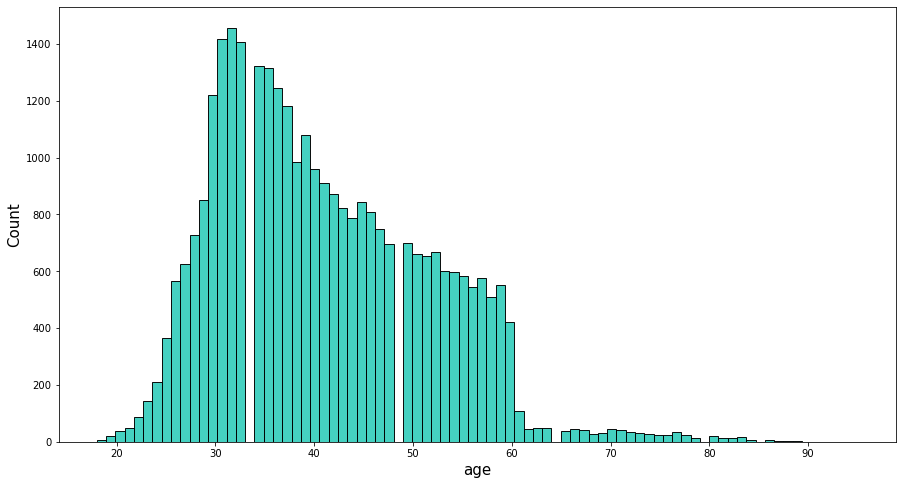

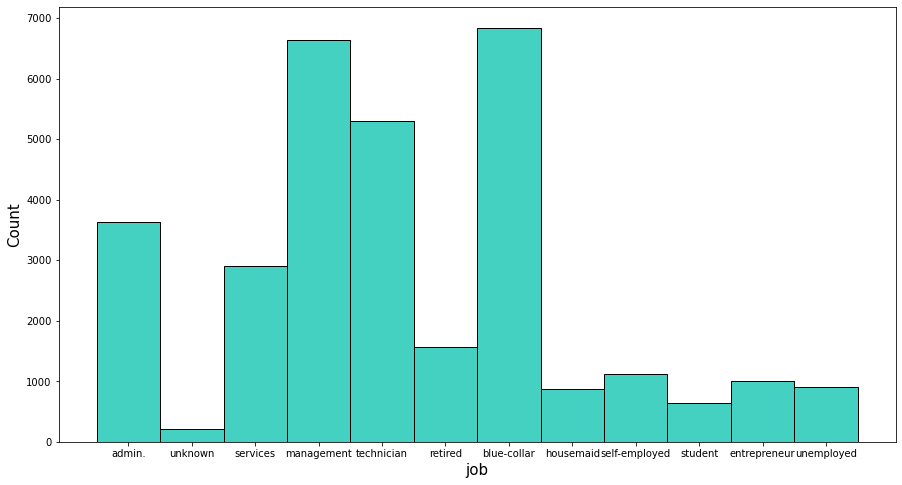

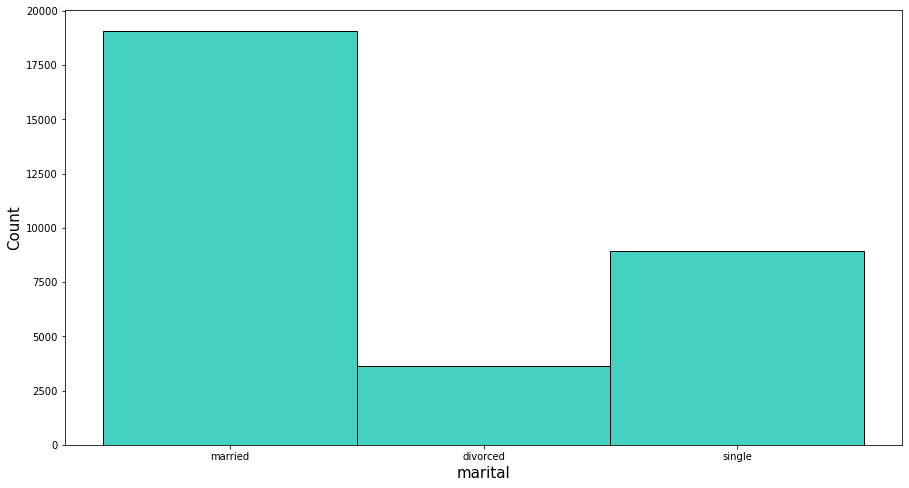

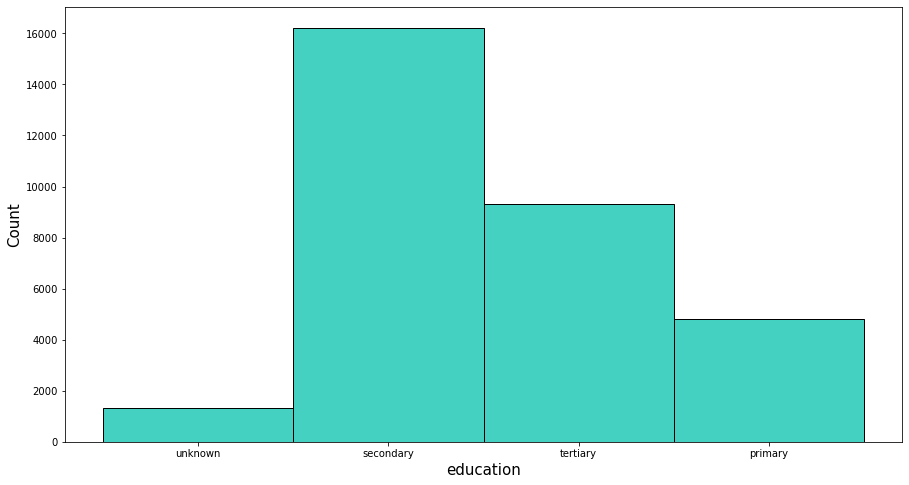

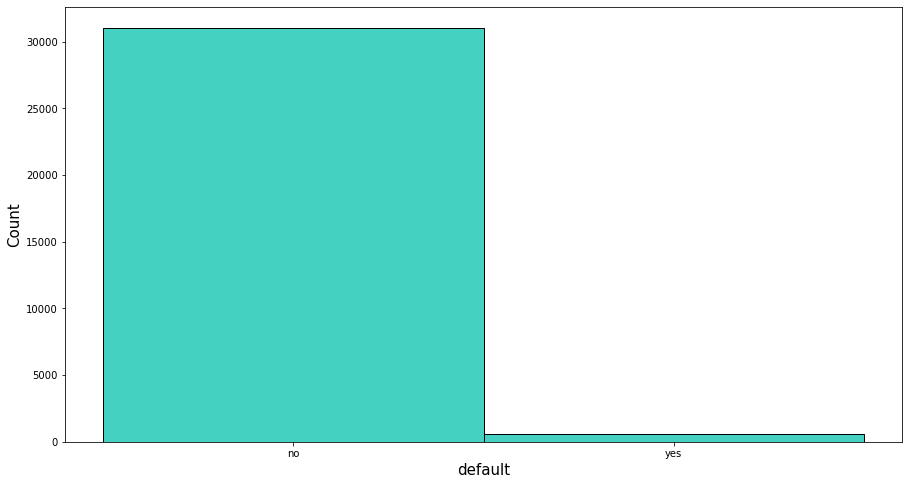

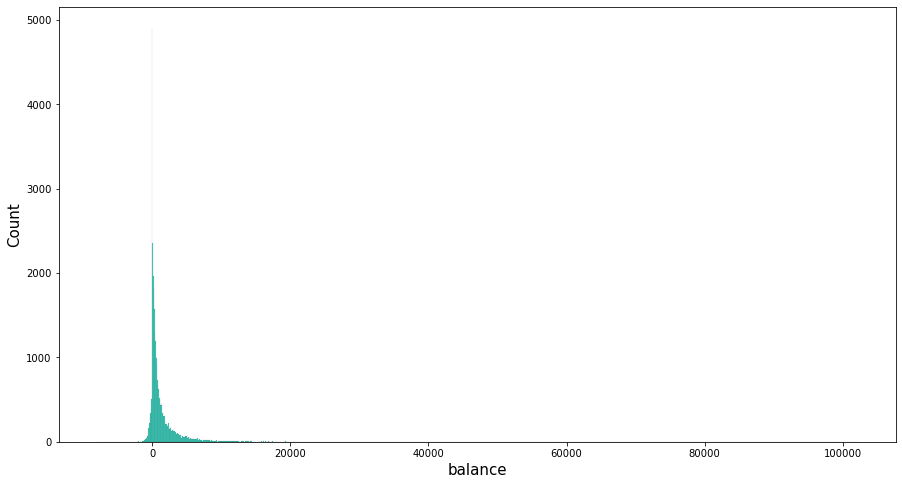

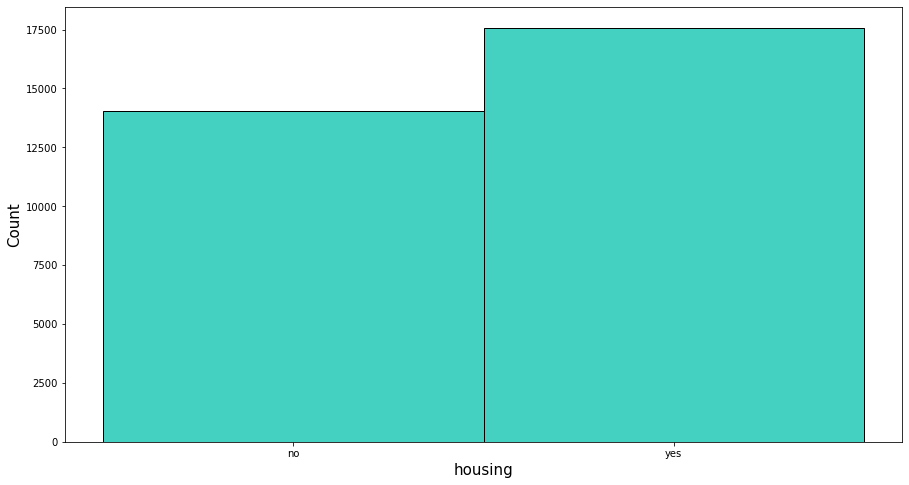

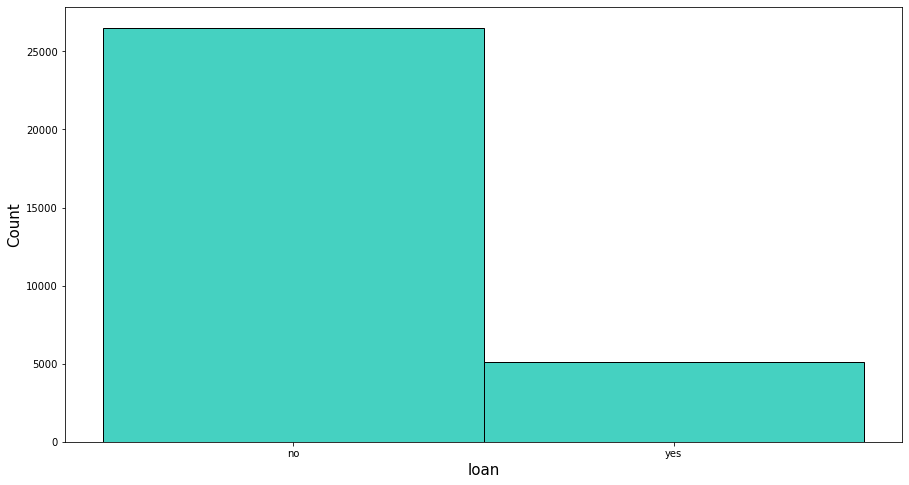

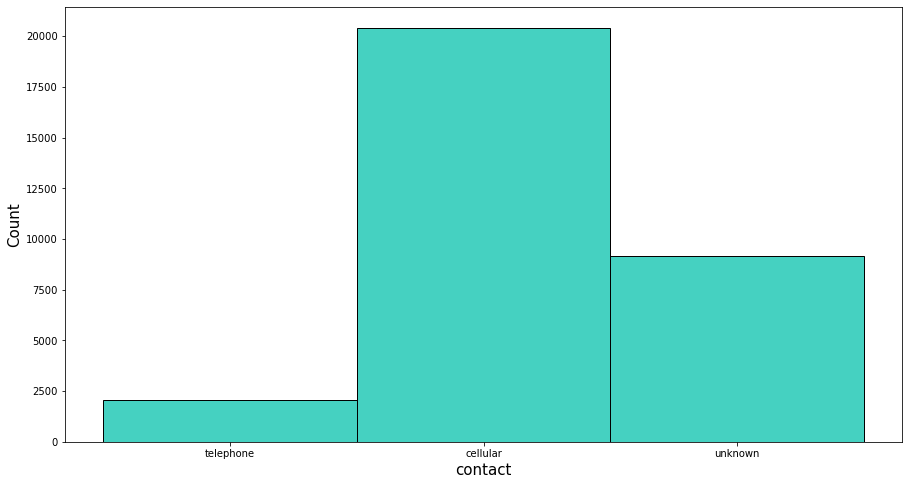

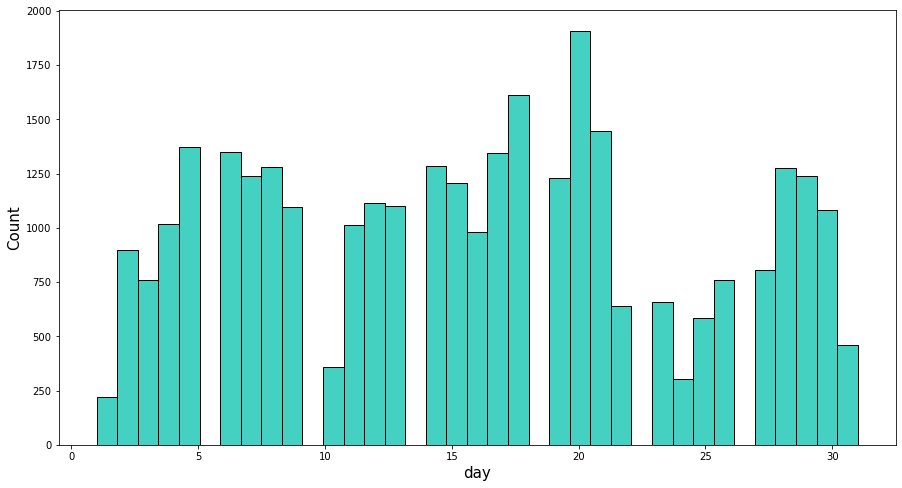

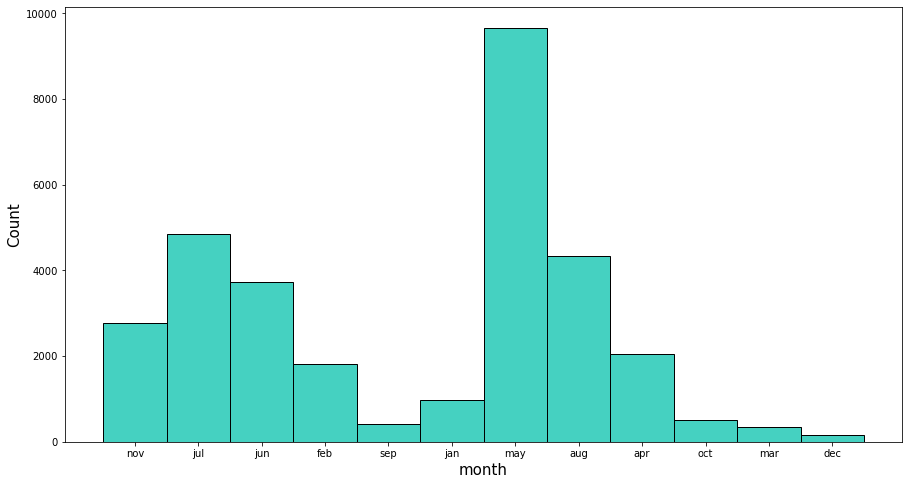

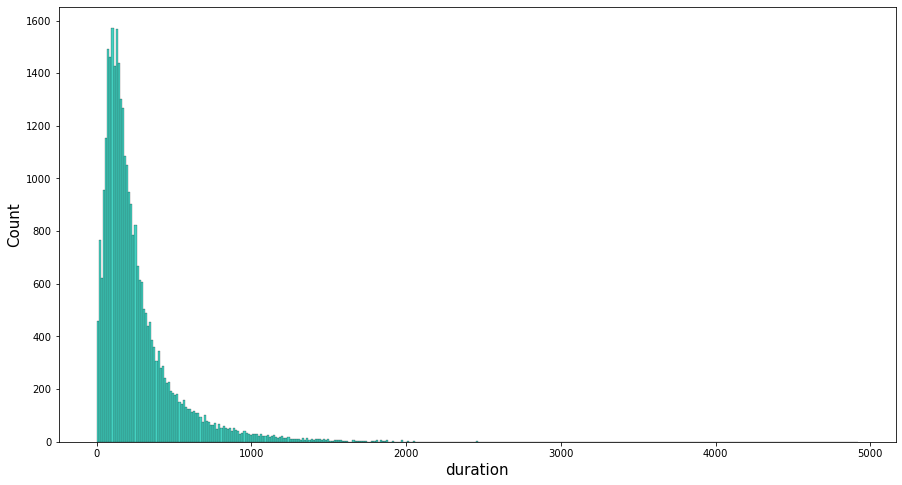

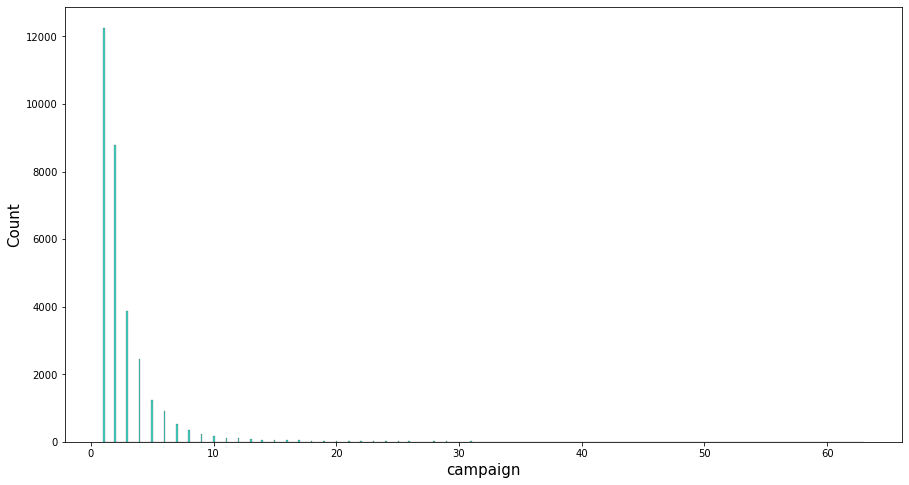

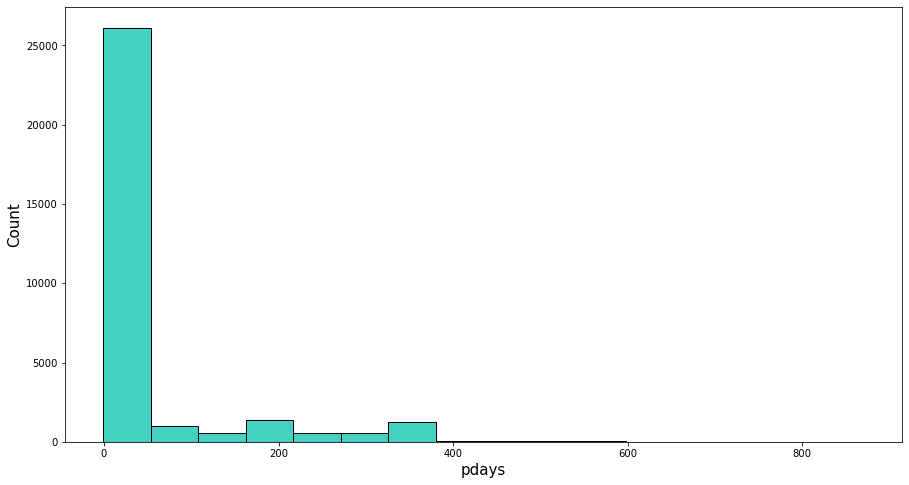

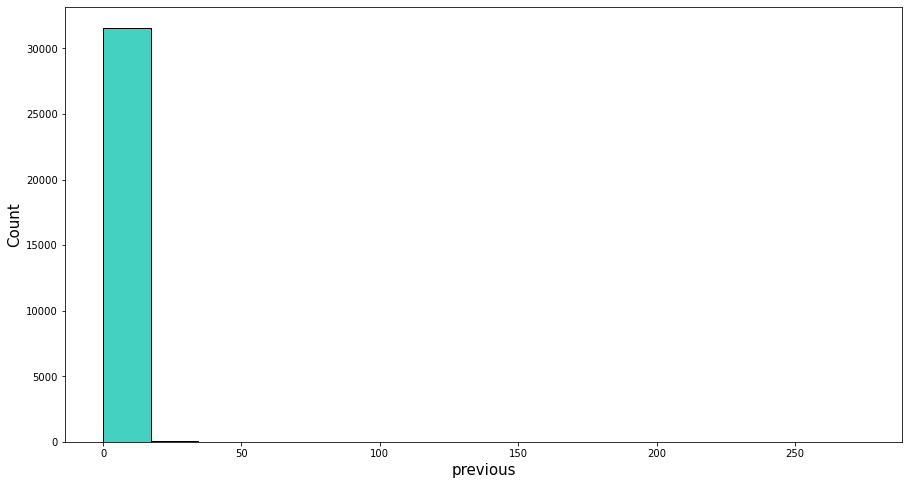

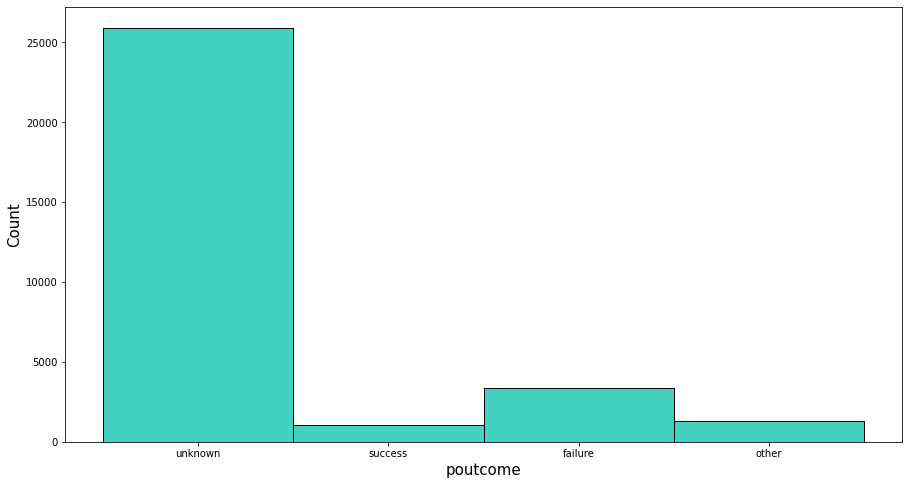

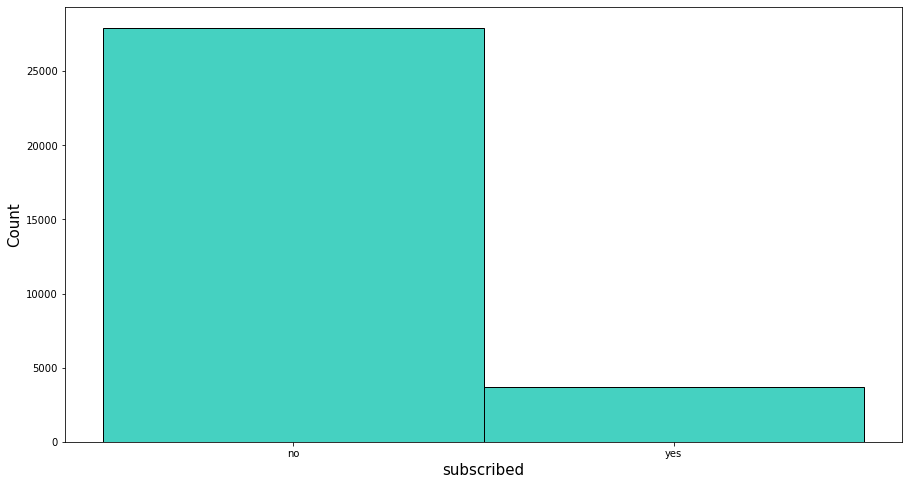

In [387]:
# Visualizing the train dataset in histplot for all the columns

for i in bank_train.columns:
    plt.figure(figsize=(15,8))
    sns.histplot(bank_train,x = i,color='#06c2ac')
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
plt.show()

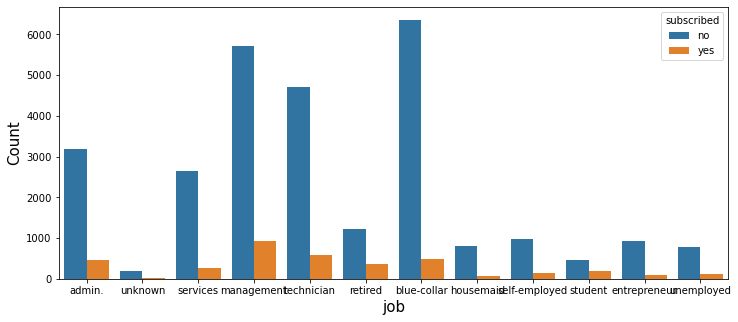

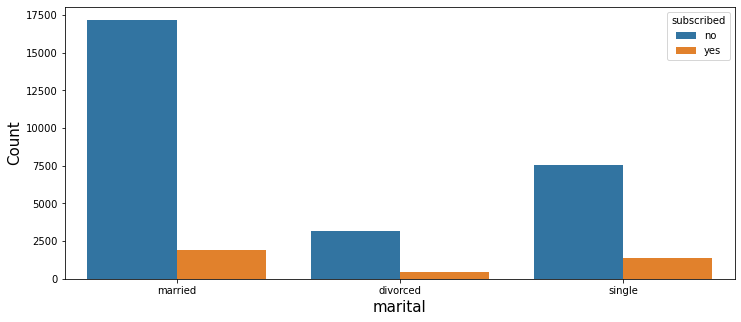

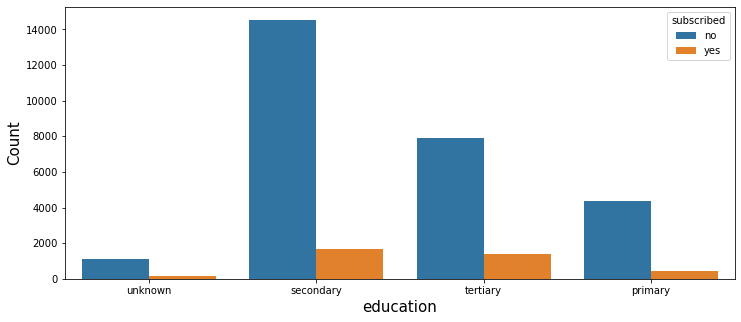

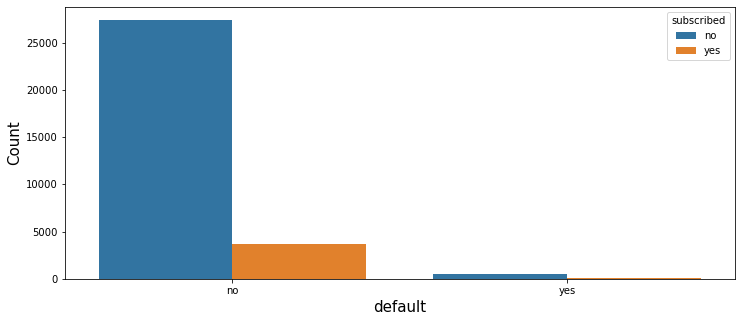

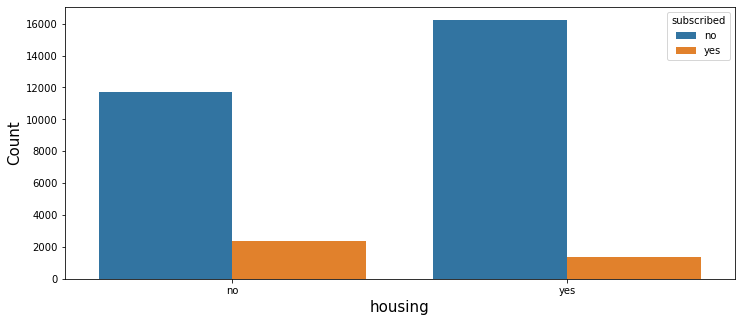

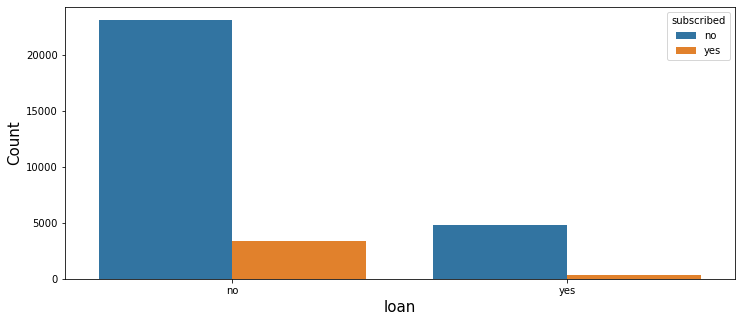

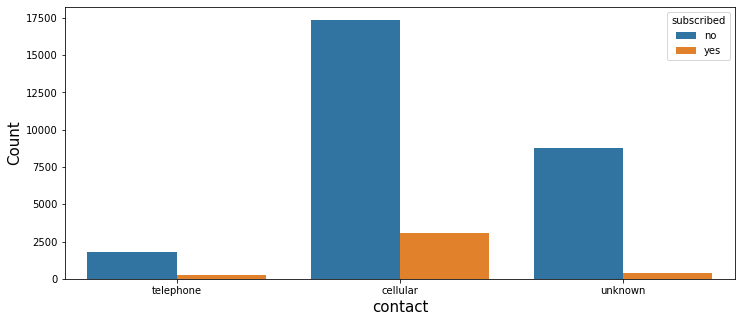

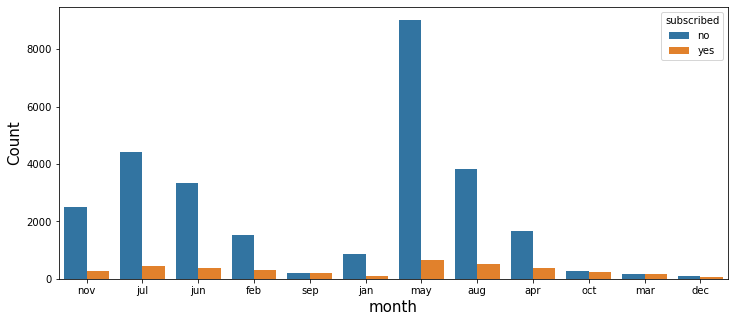

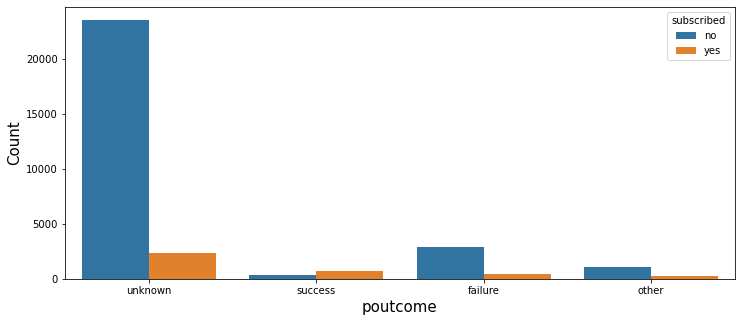

In [388]:
# Visualizing Categorical columns with Target variable

for i in bank_train_cat[0:9]:
    plt.figure(figsize=(12,5))
    sns.countplot(x=i,hue='subscribed',data=bank_train)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

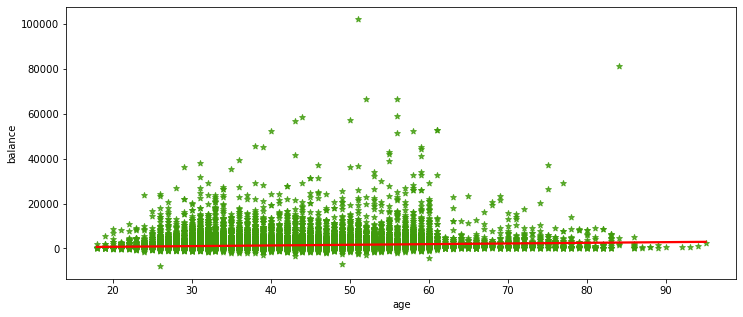

In [389]:
# Visualizing Numerical columns 

plt.figure(figsize=(12,5))
sns.regplot(x=bank_train['age'],y=bank_train['balance'],scatter_kws={"color": "#3f9b0b"}, line_kws={"color": "red"},marker='*')

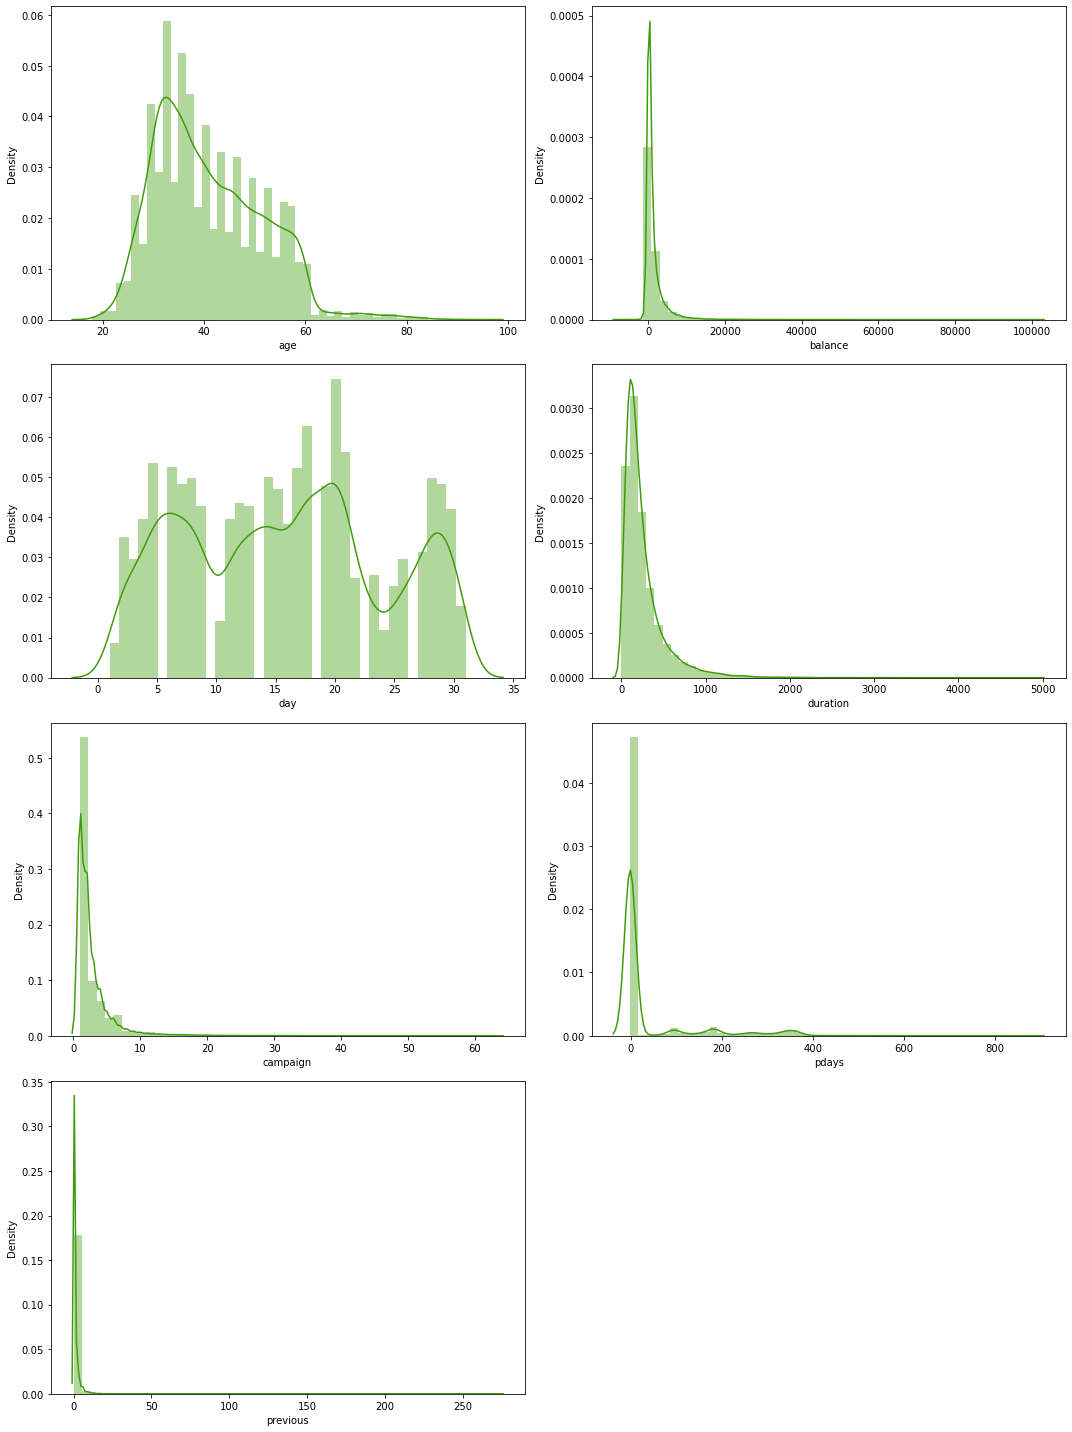

In [390]:
# Visualizing the Numerical columns with distribution plot to check the distribution

plt.figure(figsize=(15,20))
plot_number=1
for i in bank_train_num:
    if plot_number <=7:
        ax=plt.subplot(4,2,plot_number)
        sns.distplot(bank_train[i],color='#3f9b0b')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

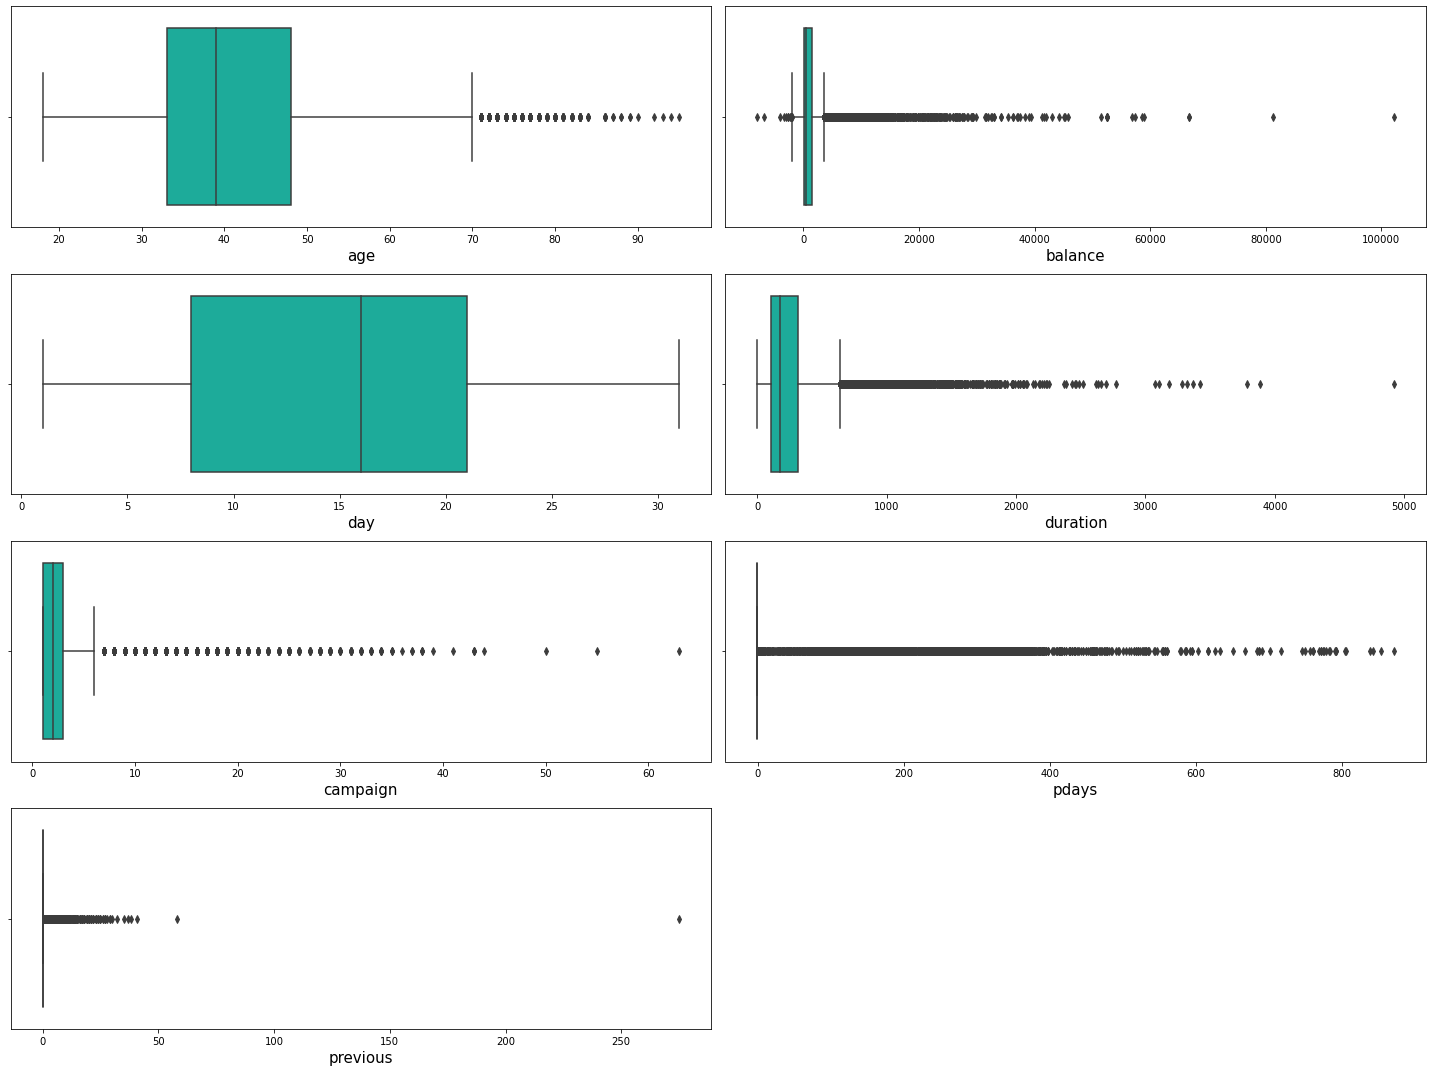

In [391]:
# Visualizing the Numerical columns in boxplot to identify outliers

plt.figure(figsize=(20,15))
plot_number=1
for i in bank_train_num:
    if plot_number <=7:
        ax=plt.subplot(4,2,plot_number)
        sns.boxplot(bank_train[i],color='#06c2ac')
        plt.xlabel(i,fontsize=15)
    plot_number+=1
plt.tight_layout()

Analysis:
    
People in the age group from mid 20's to 60 are maximum 

Most of the targeted people are in Blue collar, management, technician, admin and services in
which maximum people subcribed are from management, technician, followed by blue collar and admin

Married people subcribed more followed by single and divorced

People with secondary education are tagetted more compared with other education

People who have taken housing and personal loan have subscribed more

People are more contacted  through cellular phones and subscribed more than other means of contact

People have been contacted high during the month of May,June,July,Aug
    
Outcome of the previous marketing campaign are mostly unknown

Overall subscribed count is too low

In Numerical columns we can see the data is skewed towards right

Outliers are present in all the Numerical columns except column day


# Data Feature Selection and Engineering

In [392]:
# Applying Label encoder to categorical columns for further analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



for i in bank_train.columns:
    if(bank_train[i].dtypes=='object'):
        bank_train[i]=le.fit_transform(bank_train[i].values.reshape(-1,1))
bank_train.tail(20)

age  job  marital  education  default  balance  housing  loan  contact  \
31627   35    7        2          1        0       -2        0     0        2   
31628   43   10        0          0        0      -70        1     0        0   
31629   35    9        2          2        0      632        0     0        0   
31630   36    4        2          2        0        8        0     0        0   
31631   46    2        1          2        0      341        0     0        2   
31632   33    1        1          1        0        0        1     0        2   
31633   50    9        1          2        0     3117        0     0        2   
31634   30    9        2          2        0      432        1     1        2   
31635   35    4        1          2        0        4        0     0        0   
31636   48    3        1          0        0      469        0     0        0   
31637   44    9        1          1        0     5163        0     0        0   
31638   29    1        1          1        0      721        1     0        0   
31639   38    7        2          1        0      570        1     0        2   
31640   43    4        2          1        0     2968        0     0        2   
31641   37    9        2          2        0     1309        0     0        2   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
31627    6      6        15         1     -1         0         3           0  
31628   12      8       124         2     -1         0         3           0  
31629    7      1       141         1     -1         0         3           0  
31630   29      5       858         7     -1         0         3           0  
31631   19      6       318         2     -1         0         3           0  
31632   21      8       521         3     -1         0         3           1  
31633    9      6       174         1     -1         0         3           0  
31634    3      6       180         3     -1         0         3           0  
31635    1     11       157         2     -1         0         3           0  
31636   14      1       103         2     -1         0         3           0  
31637   11      1        48         2     -1         0         3           0  
31638   23      5       644         1     -1         0         3           0  
31639    5      8        75         2     -1         0         3           0  
31640   20      6        30         4     -1         0         3           0  
31641    6      6       442         2     -1         0         3           0  
31642   12      8       116         2     -1         0         3           0  
31643    5      6       438         2     -1         0         3           1  
31644    7      1        37         3     -1         0         3           0  
31645   15      8        22         7    337        12         0           0  
31646   11      5      1973         2     -1         0         3           1

In [393]:
# Checking the train datset with describe function

bank_train.describe()

age           job       marital     education       default  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247      4.332923      1.167220      1.225013      0.018485   
std       10.625134      3.271868      0.607186      0.749195      0.134700   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean     1363.890258      0.555629      0.162132      0.644642     15.835466   
std      3028.304293      0.496904      0.368578      0.899480      8.337097   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%        73.000000      0.000000      0.000000      0.000000      8.000000   
50%       450.000000      1.000000      0.000000      0.000000     16.000000   
75%      1431.000000      1.000000      0.000000      2.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       5.533131    258.113534      2.765697     39.576042      0.574272   
std        3.004247    257.118973      3.113830     99.317592      2.422529   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    104.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    318.500000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome    subscribed  
count  31647.000000  31647.000000  
mean       2.566152      0.117389  
std        0.982069      0.321888  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

Analysis:
    
As mentioned earlier outliers are present in numerical columns as we can see 75% to max difference is high

Data is skewed towards right were we can see mean is greater than median(50%)

For categorical columns we should not remove outliers

In [394]:
# Checking Correlation with Target variable

bank_train.corr()['subscribed'].sort_values()

contact      -0.150051
housing      -0.141092
poutcome     -0.080895
loan         -0.072266
campaign     -0.070607
day          -0.029600
month        -0.028088
default      -0.020168
age           0.024538
job           0.038921
marital       0.046043
balance       0.050807
education     0.066051
previous      0.088081
pdays         0.108290
duration      0.389838
subscribed    1.000000
Name: subscribed, dtype: float64

<AxesSubplot:>

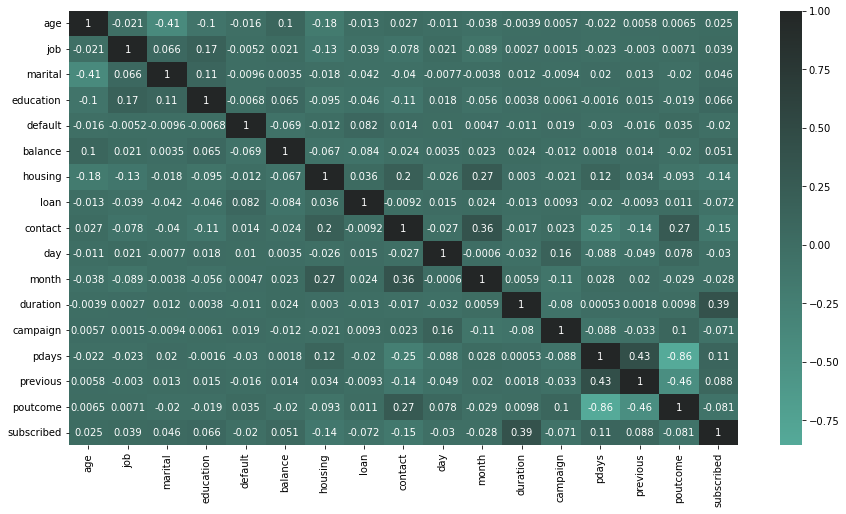

In [395]:
# Visualizing the Correlation in heatmap

plt.figure(figsize=(15,8))
sns.heatmap(bank_train.corr(),annot=True,cmap=sns.color_palette("dark:#5A9_r", as_cmap=True))

Analysis:
    
Previous and Pdays are positively correlated

Day and campaign are positively correlated

In [396]:
# Removing outliers in Numerical columns for train dataset

from scipy.stats import zscore 

num_bank = bank_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

z = np.abs(zscore(num_bank))
threshold = 3
print(np.where(z>3))

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([4, 1, 5, ..., 5, 6, 3], dtype=int64))


In [397]:
bank_train_new = bank_train[(z<3).all(axis=1)]

In [398]:
bank_train.shape

(31647, 17)

In [399]:
bank_train_new.shape

(28124, 17)

In [400]:
# Checking data loss

DL = (31647-28124)/31647*100
DL

11.132176825607482

Analysis:
    
Dataloss is at 11%, whick is ok considering the volume of the data

In [401]:
# Checking skewness

bank_train_new.skew().sort_values()

poutcome     -2.473077
month        -0.471673
housing      -0.203589
marital      -0.097176
day           0.073752
education     0.199721
job           0.260890
age           0.438496
contact       0.694487
duration      1.596552
loan          1.787691
campaign      2.059359
balance       2.437605
subscribed    2.635813
pdays         2.824483
previous      3.691573
default       7.007588
dtype: float64

In [402]:
# Removing skewness using power transform function in Numerical columns

from sklearn.preprocessing import PowerTransformer 

skew =['balance','duration', 'campaign', 'pdays', 'previous']

pt = PowerTransformer(method='yeo-johnson')
bank_train_new[skew] = pt.fit_transform(bank_train_new[skew].values)

In [403]:
bank_train_new.skew().sort_values()

poutcome     -2.473077
month        -0.471673
housing      -0.203589
marital      -0.097176
duration      0.003789
day           0.073752
balance       0.191870
education     0.199721
campaign      0.205447
job           0.260890
age           0.438496
contact       0.694487
loan          1.787691
previous      2.079774
pdays         2.080726
subscribed    2.635813
default       7.007588
dtype: float64

Analysis:
    
Skewness is high in pdays and previous

For categorical columns we will not apply transformation methods

In [404]:
# Checking the Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = bank_train_new.iloc[:,0:-1]
y = bank_train_new.iloc[:,-1]

In [405]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

     VIF Factor   Features
0     16.041536        age
1      2.844643        job
2      5.120032    marital
3      3.854521  education
4      1.054304    default
5      1.065045    balance
6      2.451373    housing
7      1.227357       loan
8      2.050829    contact
9      4.548817        day
10     5.547331      month
11     1.014298   duration
12     1.058496   campaign
13  2820.185028      pdays
14  2811.459264   previous
15    33.784124   poutcome


Analysis:
    
VIF is very high for the numerical columns pdays and previous, this will affect our Model prediciton, hence we can 
drop these columns

In [ ]:
# Dropping columns pdays and previous

bank_train_new = bank_train_new.drop(columns=['pdays','previous'])

In [411]:
bank_train_new.shape

(28124, 15)

# Model Evaluation

In [413]:
x = bank_train_new.iloc[:,0:-1]
y = bank_train_new.iloc[:,-1]

In [414]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [415]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x1_train,y_train)
    predrf = rf.predict(x1_test)
    acc = accuracy_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 91.81085565299834 on Random State 71


# Creating train_test_Split

In [416]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.30,random_state=71)

# Model Selection

In [417]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor

LG = LogisticRegression()
GN = GaussianNB()
svc = SVC()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
ET = ExtraTreesClassifier()

Model = [LG,GN,svc,DTC,KNC,RFC,GBC,ABC,BC,ET]

for m in Model:
    m.fit(x1_train,y_train)
    m.score(x1_train,y_train)
    predmod = m.predict(x1_test)
    print("Accuracy Score of", m,"is:")
    print(accuracy_score(y_test,predmod))
    print(confusion_matrix(y_test,predmod))
    print(classification_report(y_test,predmod))
    print('****************************************************************************************')

Accuracy Score of LogisticRegression() is:
0.9042427115430197
[[7497  142]
 [ 666  133]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7639
           1       0.48      0.17      0.25       799

    accuracy                           0.90      8438
   macro avg       0.70      0.57      0.60      8438
weighted avg       0.88      0.90      0.88      8438

****************************************************************************************
Accuracy Score of GaussianNB() is:
0.8740222801611757
[[7013  626]
 [ 437  362]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7639
           1       0.37      0.45      0.41       799

    accuracy                           0.87      8438
   macro avg       0.65      0.69      0.67      8438
weighted avg       0.89      0.87      0.88      8438

***************************************************************************************

# Cross Validation

In [418]:
# Cross Validation to predict which model gives more accuracy to use the model

from sklearn.model_selection import cross_val_score


cr1 = cross_val_score(LG,x1,y, cv=10)
cr2 = cross_val_score(GN,x1,y, cv=10)
cr3 = cross_val_score(svc,x1,y, cv=10)
cr4 = cross_val_score(DTC,x1,y, cv=10)
cr5 = cross_val_score(KNC,x1,y, cv=10)
cr6 = cross_val_score(RFC,x1,y, cv=10)
cr7 = cross_val_score(GBC,x1,y, cv=10)
cr8 = cross_val_score(ABC,x1,y, cv=10)
cr9 = cross_val_score(BC,x1,y, cv=10)
cr10 = cross_val_score(ET,x1,y, cv=10)



print('CV score of Logistic Regression:',cr1.mean()*100)
print('CV score of GaussianNB:',cr2.mean()*100)
print('CV score of Support Vector Classifier:',cr3.mean()*100)
print('CV score of Decision Tree Classifier:',cr4.mean()*100)
print('CV score of KNeighbors Classifier:',cr5.mean()*100)
print('CV score of Random Forest Classifier:',cr6.mean()*100)
print('CV score of Gradient Boosting Classifier:',cr7.mean()*100)
print('CV score of AdaBoost Classifier:',cr8.mean()*100)
print('CV score of Bagging Classifier:',cr9.mean()*100)
print('CV score of ExtraTrees Classifier:',cr10.mean()*100)

CV score of Logistic Regression: 90.00852448422003
CV score of GaussianNB: 87.51959885494041
CV score of Support Vector Classifier: 90.66277580366304
CV score of Decision Tree Classifier: 88.10981730322383
CV score of KNeighbors Classifier: 89.9338635040826
CV score of Random Forest Classifier: 91.34547156844948
CV score of Gradient Boosting Classifier: 91.20680805789418
CV score of AdaBoost Classifier: 90.75522277942433
CV score of Bagging Classifier: 90.81923921601545
CV score of ExtraTrees Classifier: 91.09298729380306


# AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [366]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

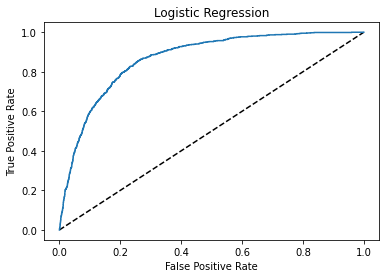

0.5755580764959459

In [367]:
y_pred_prob = LG.predict_proba(x1_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()
auc_score = roc_auc_score(y_test,LG.predict(x1_test))
auc_score

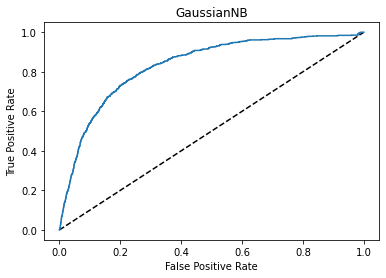

0.6910696615438504

In [368]:
y_pred_prob = GN.predict_proba(x1_test)[:,1]
fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()
auc_score = roc_auc_score(y_test,GN.predict(x1_test))
auc_score

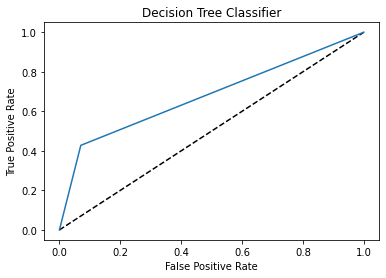

0.678802128735138

In [369]:
y_pred_prob = DTC.predict_proba(x1_test)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score = roc_auc_score(y_test,DTC.predict(x1_test))
auc_score

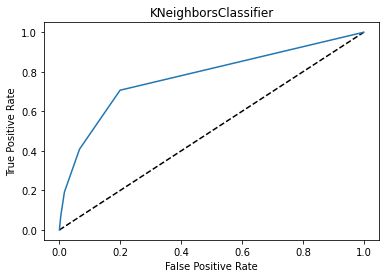

0.5875479343547122

In [370]:
y_pred_prob = KNC.predict_proba(x1_test)[:,1]
fpr3,tpr3,thresholds3 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr3,tpr3,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score = roc_auc_score(y_test,KNC.predict(x1_test))
auc_score

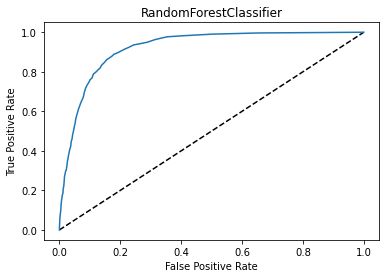

0.640759068419649

In [371]:
y_pred_prob = RFC.predict_proba(x1_test)[:,1]
fpr4,tpr4,thresholds4 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr4,tpr4,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y_test,RFC.predict(x1_test))
auc_score

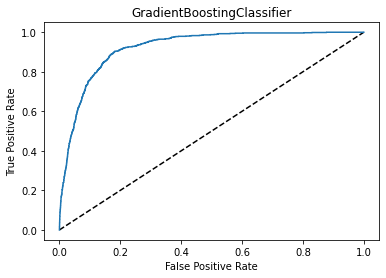

0.6605770034510347

In [374]:
y_pred_prob = GBC.predict_proba(x1_test)[:,1]
fpr5,tpr5,thresholds5 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr5,tpr5,label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score = roc_auc_score(y_test,GBC.predict(x1_test))
auc_score

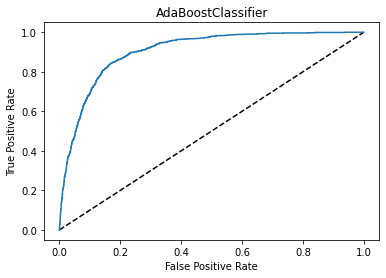

0.6591828172702991

In [375]:
y_pred_prob = ABC.predict_proba(x1_test)[:,1]
fpr6,tpr6,thresholds6 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr6,tpr6,label='AdaBoostClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score = roc_auc_score(y_test,ABC.predict(x1_test))
auc_score

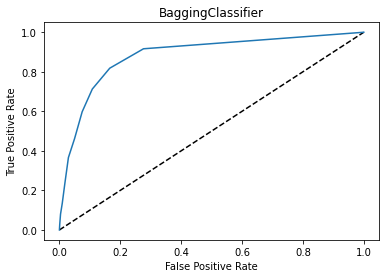

0.6682529485051487

In [376]:
y_pred_prob = BC.predict_proba(x1_test)[:,1]
fpr7,tpr7,thresholds7 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr7,tpr7,label='BaggingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BaggingClassifier')
plt.show()
auc_score = roc_auc_score(y_test,BC.predict(x1_test))
auc_score

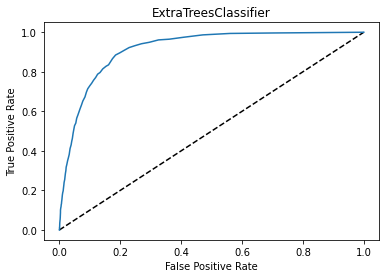

0.6123157756469197

In [377]:
y_pred_prob = ET.predict_proba(x1_test)[:,1]
fpr8,tpr8,thresholds8 = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr8,tpr8,label='ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ExtraTreesClassifier')
plt.show()
auc_score = roc_auc_score(y_test,ET.predict(x1_test))
auc_score

# Final Model

In [419]:
Final_Model = GradientBoostingClassifier( learning_rate=0.1, n_estimators=200)
Final_Model.fit(x1_train,y_train)
pred = Final_Model.predict(x1_test)
score = accuracy_score(y_test,pred)
print("Accuracy Score:",score*100)
print("Confusion Matrix: ", confusion_matrix(y_test,pred))
print("Classification_Report: ", classification_report(y_test,pred))

Accuracy Score: 91.82270680255985
Confusion Matrix:  [[7461  178]
 [ 512  287]]
Classification_Report:                precision    recall  f1-score   support

           0       0.94      0.98      0.96      7639
           1       0.62      0.36      0.45       799

    accuracy                           0.92      8438
   macro avg       0.78      0.67      0.70      8438
weighted avg       0.91      0.92      0.91      8438



# Saving the model

In [420]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Bank_Marketing_Pred.pkl")

['Bank_Marketing_Pred.pkl']

# Predicting the saved model

In [421]:
Pred_Model =joblib.load("Bank_Marketing_Pred.pkl")

#Prediction

prediction = Pred_Model.predict(x1_test)
pd.set_option('display.max_rows',None)
pd.DataFrame([Pred_Model.predict(x1_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0             0         0
1             0         0
2             0         0
3             1         1
4             0         0
5             0         0
6             1         1
7             0         0
8             0         0
9             0         0
10            0         0
11            0         0
12            1         1
13            0         0
14            0         0
15            0         0
16            0         0
17            0         0
18            0         0
19            0         0
20            0         0
21            0         0
22            0         0
23            1         0
24            0         0
25            0         0
26            0         0
27            0         0
28            1         0
29            0         0
30            0         0
31            0         0
32            0         1
33            0         0
34            0         0
35            0         0
36            0         0
37            0         0
38            0         0
39            1         1
40            0         0
41            0         0
42            0         0
43            0         0
44            0         0
45            0         1
46            0         0
47            0         0
48            0         0
49            0         0
50            0         0
51            0         0
52            0         0
53            0         0
54            0         0
55            1         1
56            0         0
57            0         0
58            0         0
59            0         0
60            1         1
61            0         0
62            0         0
63            0         0
64            0         0
65            0         0
66            0         0
67            0         0
68            0         0
69            0         0
70            0         0
71            0         0
72            0         0
73            0         0
74            0         0
75            0         0
76            0         0
77            0         0
78            0         0
79            0         0
80            0         0
81            1         0
82            0         0
83            0         0
84            0         0
85            0         0
86            0         0
87            0         0
88            0         0
89            0         0
90            1         0
91            0         0
92            0         0
93            0         0
94            0         1
95            0         0
96            0         0
97            0         0
98            0         0
99            0         0
100           0         0
101           0         0
102           1         0
103           0         0
104           0         0
105           0         0
106           0         0
107           0         0
108           0         0
109           0         0
110           0         0
111           0         0
112           0         0
113           0         0
114           0         0
115           0         0
116           0         0
117           0         0
118           0         0
119           0         0
120           0         0
121           0         0
122           0         0
123           0         0
124           0         0
125           0         0
126           0         0
127           0         0
128           0         0
129           1         0
130           0         0
131           1         1
132           0         0
133           0         0
134           0         0
135           0         0
136           0         0
137           0         0
138           0         0
139           0         1
140           0         0
141           0         0
142           0         0
143           0         0
144           0         0
145           0         0
146           0         0
147           0         0
148           1         1
149           0         0
150           0         1
151           0         0
152           0         0
15

Analysis:
    
Concluded Gradient Bagging Classifier Model as the Final and best fit model, based on Model, CV and AUC score.

Preicted result is also more similar with the original data.

Let's test the Model with train dataset

# Test Data Pre Processing

In [422]:
# Importing test dataset

bank_test = pd.read_csv('termdeposit_test.csv')
bank_test.head(10)

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   
5  16013   32     management    single   tertiary      no        0     yes   
6    196   33    blue-collar    single  secondary      no      307     yes   
7   8516   37     management   married  secondary      no      341      no   
8  31208   36     technician  divorced   tertiary      no     1381      no   
9  38462   50         admin.    single    primary      no      181     yes   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown  
5   no   cellular   22   jul       455         2     -1         0  unknown  
6   no    unknown    5   may       309         2     -1         0  unknown  
7   no    unknown    3   jun       120         2     -1         0  unknown  
8   no   cellular    2   mar       149         1     -1         0  unknown  
9   no   cellular   15   may       119         4    372         3  failure

In [423]:
# Checking the null values in test dataset 

bank_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

We will be dropping columns 'ID', 'pdays' and 'previous' to match our Model dimension

In [424]:
# Dropping the columns ['ID','pdays','previous']

bank_test = bank_test.drop(columns=['ID','pdays','previous'])
bank_test.shape

(13564, 14)

In [425]:
# Applying Label encoder to categorical columns for further analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



for i in bank_test.columns:
    if(bank_test[i].dtypes=='object'):
        bank_test[i]=le.fit_transform(bank_test[i].values.reshape(-1,1))
bank_test.tail(20)

age  job  marital  education  default  balance  housing  loan  contact  \
13544   62    5        1          1        0     1495        0     0        0   
13545   24    8        2          1        0      228        0     0        0   
13546   48    4        2          2        0     5689        0     0        0   
13547   31    9        2          2        0      236        1     0        0   
13548   37    1        1          0        0     1322        1     0        0   
13549   32    7        1          1        0     1464        1     0        2   
13550   35    4        2          2        0     -202        1     0        2   
13551   56    9        1          1        0      264        1     1        0   
13552   45    9        1          1        0     1081        1     0        0   
13553   50    6        1          1        0       36        0     0        0   
13554   51   10        1          1        0     -267        0     1        2   
13555   34    4        2          2        0     1070        0     0        0   
13556   46    6        1          0        0     3155        1     0        0   
13557   30    7        2          1        0     -174        1     0        2   
13558   32    9        2          1        0      129        1     0        0   
13559   39    4        1          2        0       45        0     0        0   
13560   54    1        1          0        0     2281        1     0        2   
13561   35    5        1          0        0      285        1     0        0   
13562   29    0        2          1        0      464        0     0        0   
13563   29    0        1          1        0        2        1     0        0   

       day  month  duration  campaign  poutcome  
13544   13     10       896         1         2  
13545    2      6       154         1         3  
13546   26      8       527         2         2  
13547   30      4       200         1         0  
13548   21      9        14         8         1  
13549    3      6       193         1         3  
13550    9      8      1461         2         3  
13551    7      8       639         2         2  
13552   17      5       127         3         3  
13553   13      1       104        10         3  
13554   19      6       208         2         3  
13555   28      1        91        15         3  
13556   21      9       271         1         3  
13557    7      8       113         1         3  
13558    7      8       213         1         3  
13559   28      1       148         4         3  
13560   20      6       158         1         3  
13561   29      4       136         1         3  
13562    9      9       208         2         2  
13563    6      8       339         1         0

# Test Model Prediction

In [427]:
Prediction_test = Pred_Model.predict(bank_test)
Test_Final_Prediction = pd.DataFrame({'Predicted_Bank_Subscribers':Prediction_test})
Test_Final_Prediction

Predicted_Bank_Marketing
0                             0
1                             0
2                             1
3                             1
4                             1
5                             1
6                             1
7                             1
8                             0
9                             1
10                            0
11                            1
12                            1
13                            1
14                            1
15                            0
16                            1
17                            1
18                            1
19                            1
20                            1
21                            0
22                            1
23                            0
24                            0
25                            0
26                            1
27                            1
28                            1
29                            1
30                            1
31                            1
32                            1
33                            0
34                            1
35                            0
36                            1
37                            1
38                            1
39                            0
40                            1
41                            0
42                            0
43                            0
44                            0
45                            1
46                            1
47                            1
48                            1
49                            0
50                            1
51                            1
52                            0
53                            1
54                            1
55                            0
56                            1
57                            1
58                            0
59                            0
60                            1
61                            0
62                            0
63                            0
64                            0
65                            0
66                            0
67                            1
68                            1
69                            1
70                            1
71                            1
72                            1
73                            1
74                            0
75                            1
76                            0
77                            1
78                            0
79                            0
80                            0
81                            0
82                            0
83                            1
84                            0
85                            1
86                            0
87                            1
88                            0
89                            1
90                            0
91                            1
92                            1
93                            1
94                            0
95                            1
96                            0
97                            0
98                            1
99                            0
100                           1
101                           1
102                           1
103                           1
104                           1
105                           0
106                           1
107                           0
108                           1
109                           0
110                           1
111                           0
112                           1
113                           0
114                           1
115                           0
116                           0
117                           1
118                           0
119                           1
120                           1
121                           1
122                           0
123                           1
124    

In [428]:
# Saving the Predicted Result to CSV

Test_Final_Prediction.to_csv("Predicted_Bank_Subscribers.csv", index=False)

# Conclusion:

Thanks for giving this opportunity to work on this Model.

Gradien Boosting Classifier, Bagging Classifier and Random Forest Classifers were performing well with 91% accuracy
but based on CV and AUC scores, I have taken Gradien Boosting Classifier for the prediction

Even Logistic regression Model and CV scores are good but not the AUC score.

Concluded Gradient Boosting Classifier Model as the Final and best fit model, based on Model, CV and AUC score.

Preicted result is also more similar with the original data.

Predicted the test data with our Final Model - using Gradient Boosting algorithm annd saved it in csv format